##Our aim for today 
* A brief Introduction to Neural Networks
* Learn the basic concepts of Convolutional Neural Networks
* How to implement them in Keras
* Train a CNN model that can differentiate between Cats and Dogs

## Popular Libraries 
There are many libraries and frameworks which are available for implementing Deep Learning tasks, but here are some of the most-loved and popular libraries among the community for Deep Learning:
##1. Tensorflow
<img src="https://cdn-images-1.medium.com/max/1200/1*iDQvKoz7gGHc6YXqvqWWZQ.png" alt="drawing" width="170"/><br>
TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.
##2. Pytorch 
<img src="https://miro.medium.com/max/1200/1*4br4WmxNo0jkcsY796jGDQ.jpeg" alt="drawing" width="300"/><br>
PyTorch is an open source machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab.
##3. Keras 
<img src="https://keras.io/img/logo-k-keras-wb.png" alt="drawing" width="300"/><br>
Keras is a library (also developed mainly by Google) which uses Tensorflow functions as its base. It has been developed with the purpose of reducing the load on developers while creating deep learning models and it is highly intuitive, allowing for quicker results, faster experimentation and testing of new ideas.

In this tutorial we will be using Keras to implement and train our model.

# A short Introduction to Neural Networks

A neural network is made up of neurons connected to each other; at the same time, each connection of our neural network is associated with a weight that dictates the importance of this relationship in the neuron when multiplied by the input value

<img src="https://miro.medium.com/max/875/1*lnZoVRZPxO8P6fCGIN-5XQ.png" height=250px>

Each neuron has an activation function that defines the output of the neuron. The activation function is used to introduce non-linearity in the modeling capability.
<img src="https://miro.medium.com/max/875/1*YXbkjcCdCRYWBmN1dndiGA.png" height=250px>

###**What is the result of training a neural network?**

A network of interconnected neurons is created, and all of them have optimized weights (basically numbers). For any input, each neuron gets an input number, multiplies that with its weight, applies the activation function, and passes it to the next neuron which again does repeats, until it passes through the entire network and you finally get a probability or numerical output, which will be our net result for the input (The input can be an Image, a sound track, text, or some tabular dataset).

### **How does it train?**
* **Step 1- Forward Propagation**: The input is sent throught the network, and after a series of multiplications and application of activation functions by each neuron of the Neural Network, we get a probabilistic/numerical/categorical output.
* **Step 2- Loss Function**: In case of Supervised Learning, the output is compared with the target output label, and the difference in the outputs is calculated. There are various kinds of loss functions which depend on what is the application, and the structure of the Dataset.
* **Step 3- Back Propagation**: Starting from the output layer, the computed loss is passed back through all the layers, and based on their contribution,the weights of each neuron in each layer is updated. So that they can provide a better and closer output for the next forward propagation. This is the role of the Optimizer. There are various different Optimizers such as Stochastic Gradient Descent (SGD), Adaptive Gradient (AdaGrad), Adaptive Moment estimation (Adam), RMSprop, etc.

In summary:

<img src="https://miro.medium.com/max/875/1*LEg-c8A6_mj5KlxNK2blvQ.png" height=360px>




In the Fully Connected/Dense Neural Network, the output of each layer is computed using the activations from the previous one, as follows:

$$h_{i} = \sigma(W_i h_{i-1} + b_i)$$

where ${h}_i$ is the activation vector from the $i$-th layer (or the input data for $i=0$), ${W}_i$ and ${b}_i$ are  the weight matrix and the bias vector for the $i$-th layer, respectively. 
<br><rb>
$\sigma(\cdot)$ is the activation function. In our example, we will use the *ReLU* activation function for the hidden layers and *softmax* for the last layer.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import tensorflow as tf
import keras

## Introducing ReLU and other activation functions

The **ReLu** function is defined as $f(x) = \max(0, x),$ [1]

A smooth approximation to the rectifier is the *analytic function*: $f(x) = \ln(1 + e^x)$

which is called the **softplus** function.

The derivative of softplus is $f'(x) = e^x / (e^x + 1) = 1 / (1 + e^{-x})$, i.e. the **logistic function**.
Other activaton functions:
<br>
<img src="https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png" height=300px>
<br>
<img src="https://www.researchgate.net/profile/Nabi-Nabiyev-2/publication/349662206/figure/fig3/AS:995882686246913@1614448343589/Working-principles-of-softmax-function.jpg" height=200px>



## Model definition
Keras supports two different kind of models: the [Sequential](http://keras.io/models/#sequential) model and the [Graph](http://keras.io/models/#graph) model. The former is used to build linear stacks of layer (so each layer has one input and one output), and the latter supports any kind of connection graph.

In our case we build a Sequential model with three [Dense](http://keras.io/layers/core/#dense) (aka fully connected) layers. Notice that the output layer has the softmax activation function. 

The resulting model is actually a `function` of its own inputs implemented 
using the Keras backend. 

We apply the binary crossentropy loss and choose SGD as the optimizer. 

Keras supports a variety of different [optimizers](http://keras.io/optimizers/) and [loss functions](http://keras.io/objectives/), which you may want to check out. 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Data preparation (`keras.dataset`)

We will train our model on the MNIST dataset, which consists of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

Since this dataset is **provided** with Keras, we just ask the `keras.dataset` model for training and test data.

We will:
* download the data
* reshape data to be in vectorial form (original data are images)
* normalize between 0 and 1.



In [14]:
from keras.datasets import mnist
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [15]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

## converting the label to array of ones and zeroes because binary_crossentropy loss (used later) needs it
Y_train = np_utils.to_categorical(y_train, 10)  
Y_test = np_utils.to_categorical(y_test, 10)
## Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

## Training the Model

In [21]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=6, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/6
352/352 [==============================] - 7s 20ms/step - loss: 2.1894 - accuracy: 0.2884 - val_loss: 2.0777 - val_accuracy: 0.4663
Epoch 2/6
352/352 [==============================] - 6s 18ms/step - loss: 1.9588 - accuracy: 0.5811 - val_loss: 1.8466 - val_accuracy: 0.6583
Epoch 3/6
352/352 [==============================] - 5s 15ms/step - loss: 1.7213 - accuracy: 0.7033 - val_loss: 1.6050 - val_accuracy: 0.7320
Epoch 4/6
352/352 [==============================] - 5s 15ms/step - loss: 1.4822 - accuracy: 0.7553 - val_loss: 1.3724 - val_accuracy: 0.7686
Epoch 5/6
352/352 [==============================] - 5s 15ms/step - loss: 1.2646 - accuracy: 0.7849 - val_loss: 1.1722 - val_accuracy: 0.7899
Epoch 6/6
352/352 [==============================] - 6s 18ms/step - loss: 1.0853 - accuracy: 0.8022 - val_loss: 1.0138 - val_accuracy: 0.8053


In [22]:
prediction = model.predict(X_test[0].reshape(1,784))


In [23]:
print(prediction)

[[0.02427863 0.01335621 0.01912368 0.03237455 0.03748696 0.03563583
  0.01378721 0.6805405  0.03866123 0.10475519]]


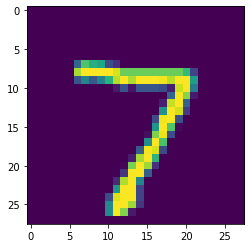

In [24]:
plt.imshow(X_test[0].reshape(28, 28))

# Convolutional Neural Networks (CNNs)
---
 ## What are CNNs?
CNN is a special type of neural network which is based on the convolution operation. A generic CNN consists of a Convlution,Maxpool,Flatten, and Dense layers. It is mainly used for image-based tasks,  types of layers: Conv (convolutional) layer, MaxPooling, Dropout, Although they can be used in Audio Clasisfication and Natural Language Processing also. Over the years, a lot of research has been done to invent new architectures that are more optimised and suitable for various tasks, for example: ResNet, YoloV5, Xception, InceptionV3,etc.
   ![cnn](https://miro.medium.com/max/470/1*81Y95NKxLzXLEut7nepmZA.png)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input,GlobalMaxPooling2D,GlobalMaxPooling1D,BatchNormalization,Dropout
from keras.models import Sequential
import numpy as np

In [ ]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
## Loading dataset from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!nvidia-smi 

Thu May  5 05:13:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Dataset source:
We will be using a dataset provided on Kaggle for our model. It has been uploaded to Google drive, and then accessed via Colab notebooks.
https://www.kaggle.com/c/dogs-vs-cats 


![catsvsdogs](https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg)

In [ ]:
## setting variables which we will use later
Image_Width=150
Image_Height=150
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

## A few commands to extract and organize our data:




In [ ]:
!unzip ./gdrive/MyDrive/cats_n_dogs/dogs-vs-cats.zip 


Archive:  ./gdrive/MyDrive/cats_n_dogs/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip ./train.zip > ../dev/null   ## ../dev/null is added so that output is not shown

In [ ]:
filenames=os.listdir("./train/")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})


In [ ]:
df

,filename,category
0,dog.9782.jpg,1
1,cat.5732.jpg,0
2,cat.609.jpg,0
3,cat.2753.jpg,0
4,dog.7606.jpg,1
...,...,...
24995,dog.5941.jpg,1
24996,cat.3767.jpg,0
24997,cat.9502.jpg,0
24998,dog.1526.jpg,1


In [ ]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)
## Since the file has now been shuffled, the indexes are messed up
## so reset_index is used to again set the index as 0,1,2,3,4,... etc.
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=30

In [ ]:
train_df

,filename,category
0,cat.5294.jpg,cat
1,dog.1783.jpg,dog
2,cat.10066.jpg,cat
3,cat.1336.jpg,cat
4,cat.7342.jpg,cat
...,...,...
19995,cat.8040.jpg,cat
19996,cat.12264.jpg,cat
19997,cat.11866.jpg,cat
19998,cat.1690.jpg,cat


### Preparing the train,validation and testing Image Data Generators using Keras
Image data generators have been used here as it is better to load the dataset while training in small batches rather than getting the entire dataset at once. This will also help in reducing the memory used while running the Google colab notebook

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size,shuffle=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
test_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                  batch_size=batch_size, )

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
del model ## incase we mess up something

In [ ]:
model =Sequential()
model.add(keras.Input(shape=(Image_Height,Image_Width,Image_Channels)))

## What are the different layers in a CNN?
* <h3>Conv (Convolutional) layer:</h3>
<br>
<img src="https://miro.medium.com/max/790/1*1VJDP6qDY9-ExTuQVEOlVg.gif" alt="drawing" width="300"/><br>
The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would.
The Convolution operation here is represented by the Conv2D function in Keras, which we had imported in the beginning.


In [ ]:
model.add(Conv2D(32,kernel_size=(3,3), activation="relu"))

* <h3>Max Pooling(MaxPool) Layer:</h3>
<br>
<img src="https://miro.medium.com/max/792/1*uoWYsCV5vBU8SHFPAPao-w.gif" alt="drawing" width="300"/><br>
Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training of the model.<br>
There are two types of Pooling: Max Pooling and Average Pooling. Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel<br>
This is represented by the MaxPooling2D function, which we had imported earlier.


In [ ]:
model.add(MaxPooling2D(2))
model.add(Conv2D(64,kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64,kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(2))

* <h3>Fully Connected (FC or Dense) Layer:</h3>
<br>
<img src="https://miro.medium.com/max/1400/1*kToStLowjokojIQ7pY2ynQ.jpeg" alt="drawing" width="600"/><br>

Adding a Fully-Connected layer is a (usually) cheap way of learning non-linear combinations of the high-level features as represented by the output of the convolutional layer. The Fully-Connected layer is learning a possibly non-linear function in that space.

Now that we have converted our input image into a suitable form for our Multi-Level Perceptron, we shall flatten the image into a column vector. 
The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training. 

Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them using the Softmax Classification technique.

We have used the `Flatten()` and `Dense()` functions to implement this as imported earlier.


In [ ]:
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation="softmax"))

##Our model so far

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

## Now it's time to train our model!

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics='accuracy')

In [ ]:
train_size= train_df.shape[0]
val_size= validate_df.shape[0]

In [ ]:
model.fit(train_generator,epochs=12,batch_size=batch_size,validation_data=validation_generator,validation_steps=val_size//batch_size)

Epoch 1/12
667/667 [==============================] - 189s 282ms/step - loss: 0.6267 - accuracy: 0.6348 - val_loss: 0.5300 - val_accuracy: 0.7424
Epoch 2/12
667/667 [==============================] - 184s 275ms/step - loss: 0.5343 - accuracy: 0.7268 - val_loss: 0.4650 - val_accuracy: 0.7699
Epoch 3/12
667/667 [==============================] - 197s 295ms/step - loss: 0.4883 - accuracy: 0.7620 - val_loss: 0.4437 - val_accuracy: 0.7976
Epoch 4/12
667/667 [==============================] - 187s 280ms/step - loss: 0.4493 - accuracy: 0.7886 - val_loss: 0.3985 - val_accuracy: 0.8177
Epoch 5/12
667/667 [==============================] - 197s 295ms/step - loss: 0.4251 - accuracy: 0.7989 - val_loss: 0.4027 - val_accuracy: 0.8139
Epoch 6/12
667/667 [==============================] - 200s 300ms/step - loss: 0.4005 - accuracy: 0.8180 - val_loss: 0.3720 - val_accuracy: 0.8376
Epoch 7/12
667/667 [==============================] - 188s 282ms/step - loss: 0.3881 - accuracy: 0.8234 - val_loss: 0.3308 -

## Looking at a few predictions from the trained model:

In [ ]:
!unzip test1.zip > ../dev/null ## ../dev/null added so that output is silent

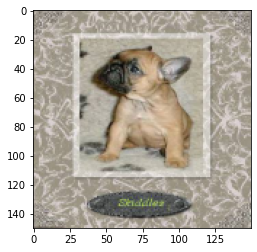

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
img_path = "./test1/10029.jpg"
img = mpimg.imread(img_path)
img = resize(img,(150,150))
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img = np.array(img,dtype=np.float32)
img = np.expand_dims(img,axis=0)
## Getting the model prediction on test images
prediction = model.predict(img)
print(prediction)
if(prediction[0][1]>prediction[0][0]):
   print("This is a dog!")
else:
   print("This is a cat!")

[[0.17667858 0.8233214 ]]
This is a dog!


In [ ]:
model.save('/content/gdrive/MyDrive/cats_n_dogs/models/origmodel.h5')

In [ ]:
from keras.models import load_model
model1 = load_model('/content/gdrive/MyDrive/cats_n_dogs/models/origmodel.h5')